# **IMPORT LIBRARIES**

In [2]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance

from sklearn.neighbors import KNeighborsClassifier

from scipy.stats import randint

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-_a0dwzqi because the default path (/home/jupyter-seanandrewchen/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


# **IMPORT DATA, TEST/TRAIN SPLIT, SCALE**

In [3]:
features = pd.read_csv("../data/paris_lille/geometric_features.csv")

X = features.drop(['class'], axis=1)
y = features[['class']].values.flatten()

X_train, X_test, y_train, y_test = train_test_split(X, y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **BASELINE KNN**

In [4]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

print(classification_report(y_test, y_pred, digits=3))
print(f1_score(y_test, y_pred, average='micro'))

                  precision    recall  f1-score   support

         Barrier      0.500     0.800     0.615        10
           Bench      0.000     0.000     0.000         1
    Bicycle Rack      0.375     0.429     0.400         7
Bicycle Terminal      0.625     1.000     0.769         5
         Bollard      0.779     0.923     0.845        65
        Building      0.667     0.800     0.727         5
           Chair      0.500     1.000     0.667         1
Distribution Box      0.875     0.700     0.778        10
      Floor Lamp      1.000     0.923     0.960        26
          Island      0.400     0.667     0.500         3
Lighting Console      0.531     0.515     0.523        33
        Low Wall      0.667     0.471     0.552        17
           Meter      0.000     0.000     0.000         1
      Mobile Car      0.500     0.125     0.200         8
      Mobile Van      0.500     1.000     0.667         1
         Natural      0.882     0.984     0.930        61
  Parked Bicy

# **HYPERPARAMETER TUNING PART I**

In [5]:
model = KNeighborsClassifier()

n_neighbors = randint(5,100)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
algorithm = ['ball_tree', 'kd_tree']

params_grid = {'n_neighbors': n_neighbors,
               'weights': weights,
               'metric' : metric,
               'algorithm': algorithm}

In [6]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=0)
random_search = RandomizedSearchCV(estimator=model, n_jobs=-1, cv=cv, param_distributions=params_grid, scoring='f1_micro')
search_results = random_search.fit(X_train, y_train)

In [7]:
search_results.best_estimator_

KNeighborsClassifier(algorithm='kd_tree', metric='euclidean', n_neighbors=9,
                     weights='distance')

In [8]:
best_model = search_results.best_estimator_
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred, digits=3))
print(f1_score(y_test, y_pred, average='micro'))

                  precision    recall  f1-score   support

         Barrier      0.615     0.800     0.696        10
           Bench      0.000     0.000     0.000         1
    Bicycle Rack      1.000     0.286     0.444         7
Bicycle Terminal      0.571     0.800     0.667         5
         Bollard      0.811     0.923     0.863        65
        Building      0.800     0.800     0.800         5
           Chair      0.000     0.000     0.000         1
Distribution Box      0.875     0.700     0.778        10
      Floor Lamp      0.960     0.923     0.941        26
          Island      0.750     1.000     0.857         3
Lighting Console      0.643     0.545     0.590        33
        Low Wall      0.909     0.588     0.714        17
           Meter      1.000     1.000     1.000         1
      Mobile Car      1.000     0.125     0.222         8
      Mobile Van      1.000     1.000     1.000         1
         Natural      0.877     0.934     0.905        61
  Parked Bicy

# **HYPERPARAMETER TUNING PART II**

In [21]:
model = KNeighborsClassifier()

n_neighbors = range(0,100)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
algorithm = ['ball_tree', 'kd_tree']

params_grid = {'n_neighbors': n_neighbors,
               'weights': weights,
               'metric' : metric,
               'algorithm': algorithm}

In [22]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=0)
grid_search = GridSearchCV(estimator=model, param_grid=params_grid, n_jobs=-1, cv=cv, scoring='f1_micro')
search_results = grid_search.fit(X_train, y_train)

In [23]:
search_results.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', metric='manhattan', n_neighbors=1)

In [24]:
best_model = search_results.best_estimator_
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred, digits=3))
print(f1_score(y_test, y_pred, average='micro'))

                  precision    recall  f1-score   support

         Barrier      0.750     0.600     0.667        10
           Bench      0.000     0.000     0.000         1
    Bicycle Rack      1.000     0.429     0.600         7
Bicycle Terminal      0.833     1.000     0.909         5
         Bollard      0.892     0.892     0.892        65
        Building      1.000     0.800     0.889         5
           Chair      1.000     1.000     1.000         1
Distribution Box      0.909     1.000     0.952        10
      Floor Lamp      0.923     0.923     0.923        26
          Island      0.600     1.000     0.750         3
Lighting Console      0.700     0.636     0.667        33
        Low Wall      0.846     0.647     0.733        17
         Mailbox      0.000     0.000     0.000         0
           Meter      1.000     1.000     1.000         1
      Mobile Car      0.375     0.375     0.375         8
      Mobile Van      0.000     0.000     0.000         1
         Natu

# **CONFUSION MATRIX**

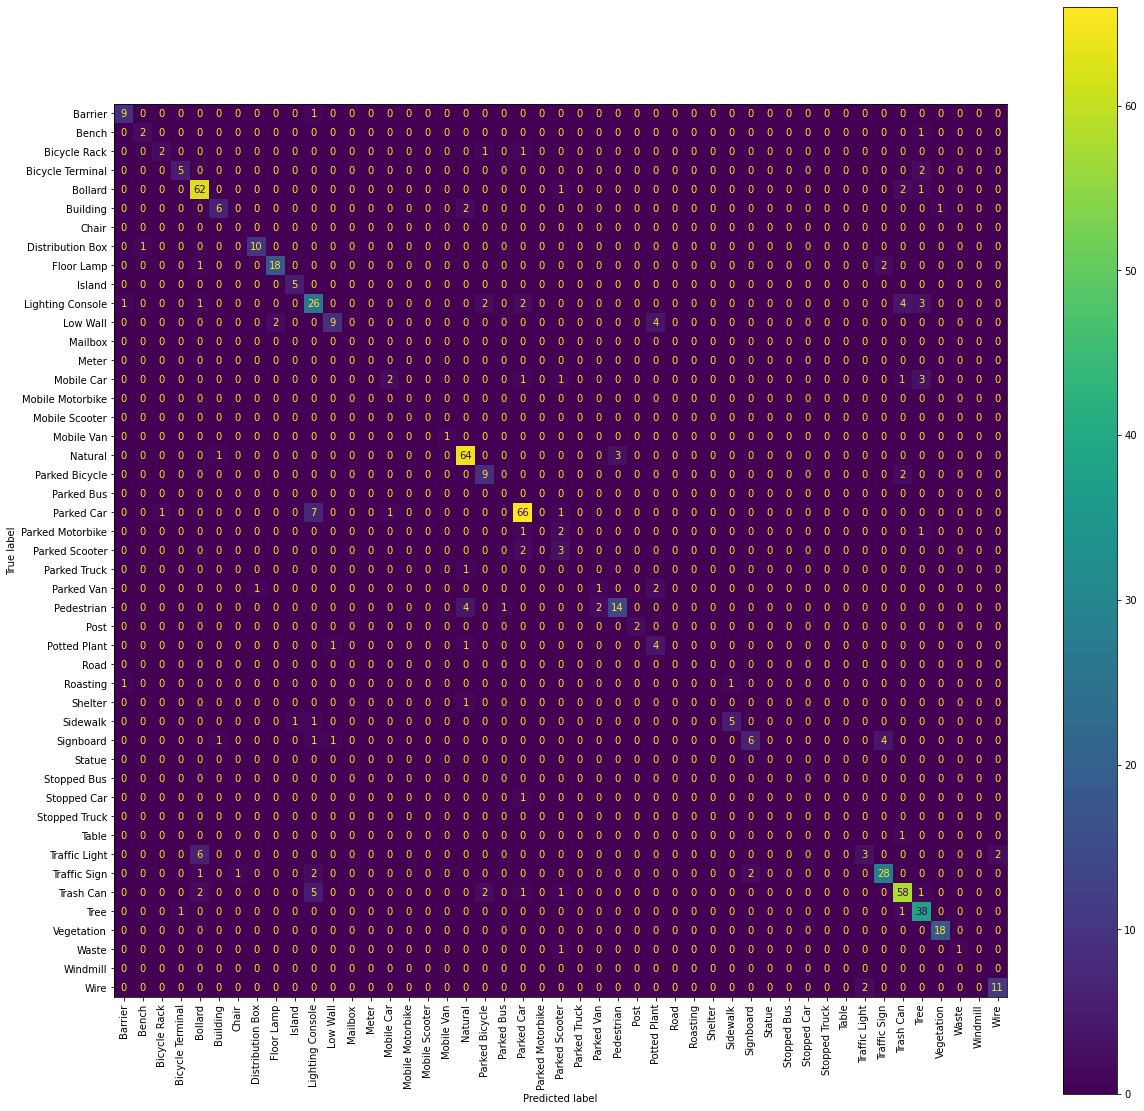

In [28]:
cm = confusion_matrix(y_test, y_pred, labels=best_model.classes_)
cmd = ConfusionMatrixDisplay(cm, display_labels=best_model.classes_)
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
cmd.plot(ax=ax, xticks_rotation='vertical');

plt.savefig('confusionmatrix_knn.png', dpi=600)

# **FEATURE IMPORTANCE**

In [29]:
results = permutation_importance(best_model, X_test, y_test, scoring='f1_micro')
importance = results.importances_mean
for i,v in enumerate(importance):
    print('Feature: %0d, Score %.5f' % (i,v))

Feature: 0, Score 0.01410
Feature: 1, Score 0.33902
Feature: 2, Score -0.00066
Feature: 3, Score 0.04000
Feature: 4, Score -0.00033
Feature: 5, Score 0.09180
Feature: 6, Score 0.01410
Feature: 7, Score 0.00459
Feature: 8, Score 0.63443


In [ ]:
plt.figure(figsize=(25,15))
plt.bar(range(len(results.importances_mean)), results.importances_mean)
plt.xticks(range(len(results.importances_mean)), X.columns)
plt.savefig('featureimportance_knn.png', dpi=600)
plt.show()